**Unicode - expanding the human readable text string alphabet**

Now consider a file with _very_ special characters. 
Have a look at the file "special.txt"
Below is what the file looks like in a hex editor 
HxD is a free hex editor availble in windows
There is also an online hex editor 

    https://hexed.it/

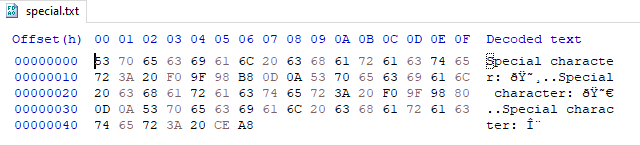

In [3]:
from IPython.display import Image
Image("hexedit.png")

And here is what happens when we read the file into a text string.

In [3]:
fin=open("special.txt","r")|
text=fin.read()
fin.close()
print(text)

Special character: ðŸ˜¸
Special character: ðŸ˜€
Special character: Î¨


Here's another example. The file special2.txt also contains special characters.

In [1]:
fin=open("special2.txt","r")
text=fin.read()
fin.close()
print(text)

UnicodeDecodeError: 'charmap' codec can't decode byte 0x90 in position 5: character maps to <undefined>

So we can't even read the file in as a text file!

Any file in our computer as consists of a sequence of *bytes*. 

A *byte* consists of 8 bits (0's and 1's). 

So each byte can be represented in various ways:

- 8 binary digits

- a decimal from 0 to 255

- 2 hexadecimal digits that is, two digits in base 16 (0,1,..,9,A,B,C,D,E,F)

We can have a look at the characters that have been read in and we see that our string almost consists of an entry for each byte.

We read in the file special.txt and special2.txt and store the bytes. And determine which bytes represent ascii characters.

When a byte is in the decimal range 0,1,...,127, i.e. hexadecimal 00 - 7F we can get a character using the built-in chr() function.

When a byte is in the decimal range 128,129,...,255 i.e. hexadecimal 80 - FF this defines an extended ascii character.

In [1]:
fin=open("special.txt","rb")
b=fin.read()
print(type(b))
print(len(b))
fin.close()
for i in range(len(b)):
    if b[i]<128:
        print(chr(b[i]))
    else: 
        print("EXTENDED ASCII")

<class 'bytes'>
71
S
p
e
c
i
a
l
 
c
h
a
r
a
c
t
e
r
:
 
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII



S
p
e
c
i
a
l
 
c
h
a
r
a
c
t
e
r
:
 
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII



S
p
e
c
i
a
l
 
c
h
a
r
a
c
t
e
r
:
 
EXTENDED ASCII
EXTENDED ASCII


In [6]:
fin=open("special2.txt","rb")
b=fin.read()
fin.close()
for i in range(len(b)):
    if b[i]<128:
        print(chr(b[i]))
    else:
        print("EXTENDED ASCII")

EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII


EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII
EXTENDED ASCII


The _chr_ function converts an integer in the range 0-255 to a character.

In [84]:
d1=0x55
d2=85
print(d1==d2)
c1=chr(d1)
c2='U'
print(c1)
print(c1==c2)

True
U
True


So an issue here is that our text file contains special _unicode_ characters. The Python interpreter doesn't know that we included these in our file until we alert it to this fact. Instead, the interpreter tries to read the file into the string as a collection of 8 bit characters


The file "special.txt" contains bytes that represent _unicode_ characters, using a particular coding referred to as _utf-8_ (More about how this encoding works below.)

If we want to read these bytes into a string and have that string represent the characters, we read the file in as a binary file and then decode the string.

When we read the file in as a binary file, we obtain a _bytes_ object.

In [57]:
fin=open("special.txt","rb")
btext=fin.read()
print(len(btext))
fin.close()
print(btext)
print(type(btext))

71
b'Special character: \xf0\x9f\x98\xb8\r\nSpecial character: \xf0\x9f\x98\x80\r\nSpecial character: \xce\xa8'
<class 'bytes'>


When we print a bytes object to the screen, the ascii characters are shown in their usual representation, while the bytes represeneting non-ascii characters are show as \xhh where hh consists of two hexadecimal characters.

**Decoding**

This can be then *decoded* to produce a text string with <u> unicode </u> characters.

In [4]:
fin=open("special.txt","rb")
btext=fin.read() # read every byte into btext
print(btext)
fin.close()
len(btext)

b'Special character: \xf0\x9f\x98\xb8\r\nSpecial character: \xf0\x9f\x98\x80\r\nSpecial character: \xce\xa8'


71

Now decode it

In [3]:
text=btext.decode()
print(text)
print(type(text))
print(len(text))

Special character: 😸
Special character: 😀
Special character: Ψ
<class 'str'>
64


So we see that Python <u> strings </u> can contain these special unicode characters. A string containing a unicode character has length 1, despite the fact that its binary representation can consist of more than 2 bytes.

In [13]:
funnyface=btext[19:23].decode()
print(funnyface)
print(len(funnyface))

😸
1


In [14]:
print(text[19])
print(len(text[19]))

😸
1


If we try to write our string out to a file we get an error.

In [5]:
fout=open("try.txt","w")
fout.write(text)
fout.close()

UnicodeEncodeError: 'charmap' codec can't encode character '\U0001f638' in position 19: character maps to <undefined>

**Encoding**

Going in the other direction, if we have a string with unicode characters in it, then to print it out, we need to encoded it as a bytes object, and write it as a binary file.

In [6]:
fout=open("try.txt","wb")
bt=text.encode()
print(type(bt))
fout.write(bt)
fout.close()

<class 'bytes'>


In [18]:
btext2=text.encode()
fout=open("output4.txt","wb")
fout.write(btext2)
fout.close()


**How does utf-8 encoding work**

The encoding method is described enthusiastically in a fun YouTube video here. (Looks like he recorded from a hotel lobby.)

https://www.youtube.com/watch?v=MijmeoH9LT4

Thomas "Tom" Scott[2] is an English YouTuber, educator, game show host and web developer:

https://en.wikipedia.org/wiki/Tom_Scott_(presenter)


The basic idea is explained in the following image.

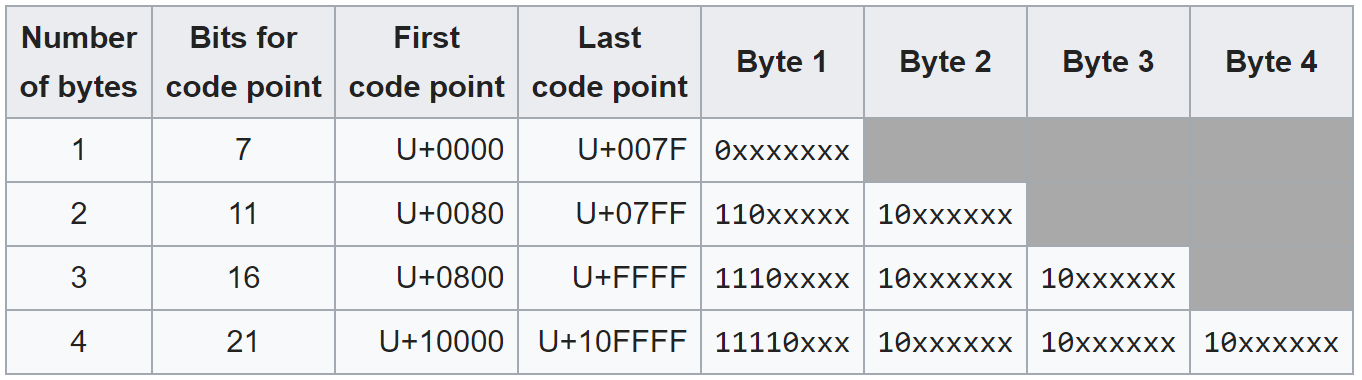

In [127]:
from IPython.display import Image
Image("utf-8.png")

When a byte appears in the stream whose first bit is 0, this indicates that the next 7 bits give code (0-127) of an ascii character.

When a byte starts with 110xxxxx, this indicates that the next byte will be of the form 10xxxxxx, and the 11 avilaiable bits can be used to encode a character.

When a byte starts with 1110xxxx, this indicates that the next two bytes will be of the form 10xxxxxx, and the 16 avilaiable bits can be used to encode a character.

When a byte starts with 11110xxx, this indicates that the next three bytes will be of the form 10xxxxxx, and the 21 avilaiable bits can be used to encode a character.

As a result, we are able to encode 2,164,864 possible characters.


In [128]:
2**21 + 2**16 + 2**11 + 2**7

2164864

For example, the binary representations of the special characters mentioned above are:

\xf0\x9f\x98\xb8 represents the decimal 4,036,991,160 which in binary takes the form 11110000|10011111|10011000|10111000

\xf0\x9f\x98\x80 represents the decimal 4,036,991,104 which in binary takes the form 11110000|10011111|10011000|10000000

\xce\xa8 represents the decimal 53,904 which in binary takes the form 11001110|10101000

Below we see how these calculations can be done in Python.

In [135]:
bin(0xf0*256**3+0x9f*256**2+0x98*256+0x80)

'0b11110000100111111001100010000000'

In [137]:
0xce*256+0xa8

52904

In [6]:
bin(0xf0)

'0b11110000'

In [7]:
bin(0x9f)

'0b10011111'

**Code points**

Strings with unicode characters behave like strings we've seen before.

In [2]:
fin=open("special.txt","rb")
btext=fin.read()
fin.close()
text=btext.decode()
print(text)

Special character: 😸
Special character: 😀
Special character: Ψ


In [10]:
len(text)

64

We can isolate these special characters

In [16]:
c1=text[19]
c2=text[41]
c3=text[63]
print(c1,c2,c3)

😸 😀 Ψ


Every Unicode character has a code point, which we can look up in standard unicode tables.

The function ord() gives us the code point of a character.

In [17]:
print(ord(c1))
print(ord(c2))
print(ord(c3))

128568
128512
936


So we can go to our online character table and find the code point for some character. 

Here

https://www.unicode.org/charts/PDF/U1F600.pdf

We find that the code point for the smiling face with sunglasses is 1F60E. This is a hexadecimal representation of a code point.

To convert from code point to character, we use _chr()_.

In [196]:
d=0x1F60E
print(d)

128526


In [197]:
chr(128526)

'😎'

Here os a link to the unicode character table:

https://unicode-table.com/en/

We can choose a character from this page and insert it into a text string.

In [199]:
c=chr(0x1F60E)
print(c)

😎


Flowers from that site

https://unicode-table.com/en/sets/symbols-for-nickname/#flowers

In [19]:
c1=chr(0x2749)
c2=chr(0x1f33c)
c3=chr(0x1f337)
print(c1+c2+c3)

❉🌼🌷


In [3]:
It is possible to have a binary file with mal-formed utf-8 encoding.

1111 1110

SyntaxError: invalid syntax (826327269.py, line 1)

In [5]:
bst=bytearray()
bst.append(0xFE)
bst.decode()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfe in position 0: invalid start byte